#PCA V/S t-SNE

Every Data science practitioner is very well aware of the fact that, as the number of dimension increase the structure becomes more and more complex. It becomes more harder to visualise and interpret, but </bold>Dimension Reduction<bold> is much more than that.
    Dimension reduction is a method of making data easier to handle by understanding the internal structure. That is usually many attributes are used to determine a class label in any real word problem. The question to be asked is
    1.Is all the attributes required to represent the data.
    2.Can we preserve the relationship and yet bring down the dimensionality.
    
Here we look upon two such very popular techniques. PCA and t-SNE.


In [1]:
#the basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
df=pd.read_csv('./MNIST_train.csv')
df.columns                       #to check the attributes

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [3]:
# here we separate the data and labels.

label=df['label']
data=df.drop('label',axis=1)
                           

In [4]:
# to varify our above operation for data preparation
data.head(5) 
print(data.shape)
print(label.shape)

(42000, 784)
(42000,)


##sample code for displaying the original image

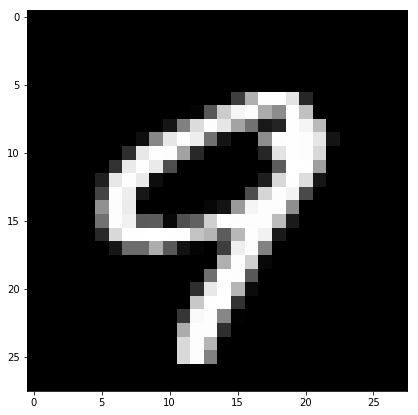

9


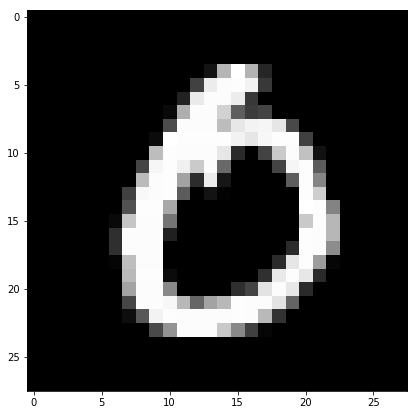

0


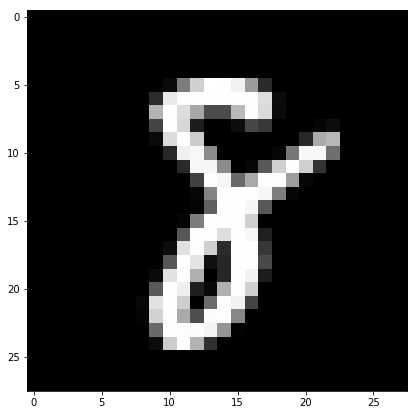

8


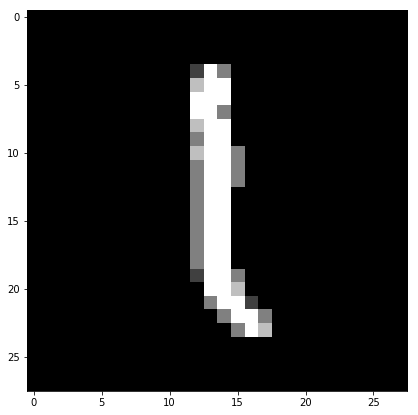

1


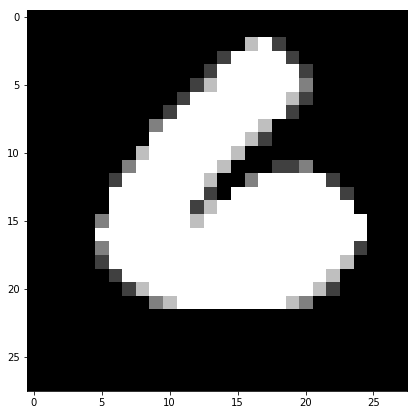

6


In [5]:
# this is the sample code for ploting a number and 
arr=[100,200,300,400,500]
for i in arr:
    
    plt.figure(figsize=(7,7))
    idx = i
    grid_data = data.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.show()

    print(label[idx])

In [6]:
# Data-preprocessing: Standardizing the data

data = data.astype('float64')

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


In [7]:
##PCA

In [8]:
# initializing the pca model
from sklearn import decomposition
pca = decomposition.PCA()

In [9]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (42000, 2)


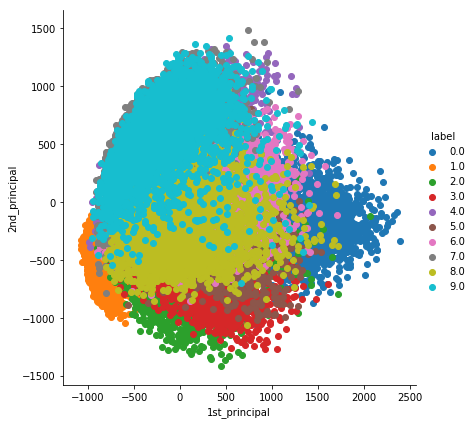

In [10]:
# attaching the labels with the transformed data 
pca_data = np.vstack((pca_data.T, label)).T
pca_data.shape

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))

#ploting the results
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

Here we can note that PCA does a fair job of reducing the data dimensionaly as well as preserve the whole structure of data along linear varience. 

In [11]:
##t-SNE

In [12]:
from sklearn.manifold import TSNE 

In [13]:
# I used the default perplexity and default learning rate which are 30 and 200 respectively 
model = TSNE(n_components=2, random_state=0 ,n_iter=5000)

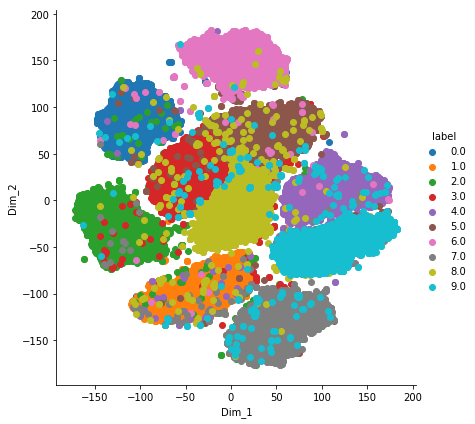

In [14]:
tsne_data = model.fit_transform(data)

tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()